## Métodos de Otimização: Métodos de procura multidimensional

### Gradiente Conjugado- Diferenças finitas

__Imports:__

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
name = 'Gradiente Conjugado' 
Start = time.time()

__Função Avaliada:__

In [11]:
x=np.zeros(2 , dtype = 'float')
G =np.zeros(2 , dtype = 'float')

def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

__Método:__

In [12]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 18; Qvar = 2
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [13]:
def direcao(G,gamma,dold):
    
    d = -G+gamma*dold
    
    return d

In [14]:
def coef_conj(G,Gold):
    eps = 1.e-6
    numerador = np.dot(G,G)
    denominador = np.dot(Gold,Gold)
    
    if numerador<eps or denominador<eps:
        flag = 1
        return flag
        
    else:
        # Fletcher-Reeves
        gamma = numerador/denominador
        return gamma

In [15]:
def alphaFibonacci(n = 10):

    F = np.zeros( (n+1),dtype='float' )
    I = np.zeros( (n+1),dtype='float' )
    I[0]=x[-1]-x[0]
    F[0] = 1; F[1] = 1

    for i in range(2,n+1): F[i]=F[i-2]+F[i-1]

    for i in range(0,n):
        left = False; right = False
        dist = F[n-2-i]/F[n-i]*I[i]
        print
        if f(x[0])>f(x[0]+dist): left = True 

        if f(x[-1])>f(x[-1]-dist): right = True 

        if (left == True) and (right == False): Xi=x[0]+dist; Xf=x[-1]
        elif (left == False) and (right == True): Xf=x[-1]-dist; Xi=x[0]
        elif f(x[0]+dist)>f(x[-1]-dist): Xi=x[0]+dist; Xf=x[-1]
        else: Xf=x[-1]-dist; Xi=x[0]

        x = np.linspace(Xi, Xf)
        I[i+1]=x[-1]-x[0]   

In [16]:
nFunc = 18; Qvar = 2; countFunc = 0

G =np.zeros(2 , dtype = 'float')
Gold =np.zeros(2 , dtype = 'float')
xold =np.zeros(2 , dtype = 'float')
xnew =np.zeros(2 , dtype = 'float')
d =np.zeros(2 , dtype = 'float')
dold =np.zeros(2 , dtype = 'float')
fHist = []
layout = "{0:.5f}"

#chute incial:
x1 = -1.5
x2 = -3.1

alfa=0.1; kmax=50; k=0
xold[0]=x1; xold[1]=x2; F0,countFunc = f(xold,nFunc,Qvar,countFunc)
print(layout.format(xold[0])+" "+layout.format(xold[1])+" "+layout.format(F0))
flag=0

# Primeira iteração k=0

# Calculo Gradiente
G,countFunc = grad(xold,countFunc)

#Calculo da direção
gamma = 0
d = direcao(G,gamma,dold)

# Processo iterativo
xnew=xold+alfa*d

#Atualiza xold
xold = xnew.copy()

#Calculo da função
F,countFunc = f(xnew,nFunc,Qvar,countFunc)
print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
fHist.append(F)

while k < kmax:
    k += 1
    
    # Calculo Gradiente
    Gold = G.copy()
    G,countFunc = grad(xold,countFunc)
    
    #Calculo gamma
    gamma = coef_conj(G,Gold)
    
    if flag==0:
        #Calculo da direção
        dold = d.copy()
        d = direcao(G,gamma,dold)

        # Processo iterativo
        xnew=xold+alfa*d

        #Atualiza xold
        xold = xnew.copy()

        #Calculo da função
        F,countFunc = f(xnew,nFunc,Qvar,countFunc)
        print(layout.format(xnew[0])+" "+layout.format(xnew[1])+" "+layout.format(F))
        fHist.append(F)

-1.50000 -3.10000 -10.81748
-1.57580 -3.14310 -10.85223
-1.56986 -3.13962 -10.85249
-1.56393 -3.13624 -10.85224
-1.56440 -3.13656 -10.85228
-1.57069 -3.14024 -10.85249
-1.56989 -3.13965 -10.85249
-1.56910 -3.13907 -10.85249
-1.56910 -3.13919 -10.85249
-1.56980 -3.13977 -10.85249
-1.56981 -3.13968 -10.85249
-1.56982 -3.13959 -10.85249
-1.56983 -3.13949 -10.85249
-1.56984 -3.13950 -10.85249
-1.56976 -3.13962 -10.85249
-1.56968 -3.13973 -10.85249
-1.56970 -3.13975 -10.85249
-1.56982 -3.13967 -10.85249
-1.56993 -3.13958 -10.85249
-1.56995 -3.13960 -10.85249
-1.56987 -3.13972 -10.85249
-1.56979 -3.13983 -10.85249
-1.56971 -3.13975 -10.85249
-1.56981 -3.13954 -10.85249
-1.56989 -3.13958 -10.85249
-1.56983 -3.13970 -10.85249
-1.56977 -3.13982 -10.85249
-1.56981 -3.13983 -10.85249
-1.56988 -3.13967 -10.85249
-1.56996 -3.13950 -10.85249
-1.56993 -3.13953 -10.85249
-1.56982 -3.13964 -10.85249
-1.56971 -3.13986 -10.85249
-1.56970 -3.13977 -10.85249
-1.56980 -3.13952 -10.85249
-1.56982 -3.13958 -1

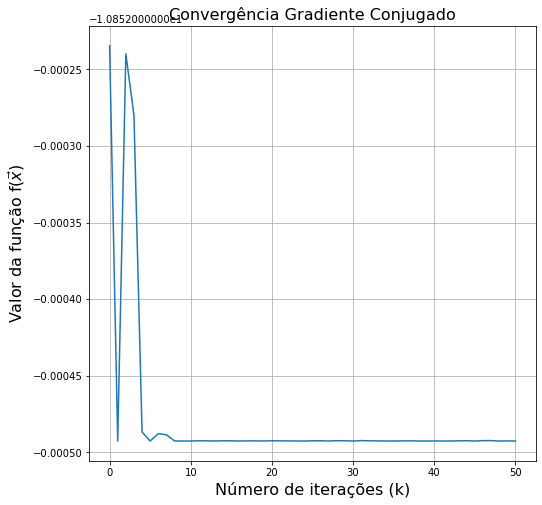

In [17]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [18]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  256
Tempo de Execução = 5.249463081359863 s
